<a href="https://colab.research.google.com/gist/Ghazal-Ghajari/5a9ff697c9e3c6d69e38dac691e8f4e1/qgans_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit-algorithms
!pip install qiskit-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.9/306.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512587 sha256=26d0ddb3b1c6baa5d12ae2abe5fe2d669cd26fb60d9baa729

In [ ]:
import numpy as np
import torch
from qiskit_algorithms.utils import algorithm_globals
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib import cm
from qiskit import QuantumCircuit
from qiskit.circuit.library import EfficientSU2
from qiskit.primitives import Sampler
from qiskit_machine_learning.connectors import TorchConnector
from qiskit_machine_learning.neural_networks import SamplerQNN
from torch import nn
from torch.optim import Adam
from IPython.display import clear_output
import time
from scipy.stats import multivariate_normal, entropy
import qiskit.tools.jupyter


In [ ]:
algorithm_globals.random_seed = 123456
_ = torch.manual_seed(123456)  # suppress output

In [ ]:
num_dim = 2
num_discrete_values = 8
num_qubits = num_dim * int(np.log2(num_discrete_values))

In [ ]:
coords = np.linspace(-2, 2, num_discrete_values)
rv = multivariate_normal(mean=[0.0, 0.0], cov=[[1, 0], [0, 1]], seed=algorithm_globals.random_seed)
grid_elements = np.transpose([np.tile(coords, len(coords)), np.repeat(coords, len(coords))])
prob_data = rv.pdf(grid_elements)
prob_data = prob_data / np.sum(prob_data)

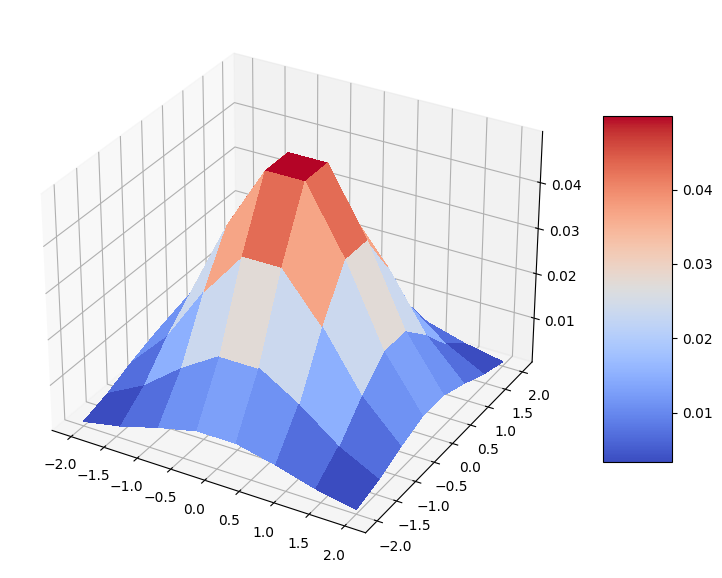

In [ ]:
mesh_x, mesh_y = np.meshgrid(coords, coords)
grid_shape = (num_discrete_values, num_discrete_values)

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={"projection": "3d"})
prob_grid = np.reshape(prob_data, grid_shape)
surf = ax.plot_surface(mesh_x, mesh_y, prob_grid, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
qc = QuantumCircuit(num_qubits)
qc.h(qc.qubits)

ansatz = EfficientSU2(num_qubits, reps=6)
qc.compose(ansatz, inplace=True)

In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=fab59e317f324533137a1112510ec3d9efb397c31ebbdbdbc86d3ac05cef11b1
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
qc.decompose().draw("text")

┌─────────┐┌──────────┐ ┌──────────┐                               »
q_0: ┤ U2(0,π) ├┤ Ry(θ[0]) ├─┤ Rz(θ[6]) ├───────────────────────────────»
     ├─────────┤├──────────┤ ├──────────┤                               »
q_1: ┤ U2(0,π) ├┤ Ry(θ[1]) ├─┤ Rz(θ[7]) ├───────────────────────────────»
     ├─────────┤├──────────┤ ├──────────┤                               »
q_2: ┤ U2(0,π) ├┤ Ry(θ[2]) ├─┤ Rz(θ[8]) ├────────────────────────■──────»
     ├─────────┤├──────────┤ ├──────────┤                      ┌─┴─┐    »
q_3: ┤ U2(0,π) ├┤ Ry(θ[3]) ├─┤ Rz(θ[9]) ├───────────■──────────┤ X ├────»
     ├─────────┤├──────────┤┌┴──────────┤         ┌─┴─┐    ┌───┴───┴───┐»
q_4: ┤ U2(0,π) ├┤ Ry(θ[4]) ├┤ Rz(θ[10]) ├──■──────┤ X ├────┤ Ry(θ[16]) ├»
     ├─────────┤├──────────┤├───────────┤┌─┴─┐┌───┴───┴───┐├───────────┤»
q_5: ┤ U2(0,π) ├┤ Ry(θ[5]) ├┤ Rz(θ[11]) ├┤ X ├┤ Ry(θ[17]) ├┤ Rz(θ[23]) ├»
     └─────────┘└──────────┘└───────────┘└───┘└───────────┘└───────────┘»
«                               ┌───────────┐┌───────────┐             »
«q_0: ───────────────────■──────┤ Ry(θ[12]) ├┤ Rz(θ[18]) ├─────────────»
«                      ┌─┴─┐    ├───────────┤├───────────┤             »
«q_1: ──────■──────────┤ X ├────┤ Ry(θ[13]) ├┤ Rz(θ[19]) ├──────■──────»
«         ┌─┴─┐    ┌───┴───┴───┐├───────────┤└───────────┘    ┌─┴─┐    »
«q_2: ────┤ X ├────┤ Ry(θ[14]) ├┤ Rz(θ[20]) ├──────■──────────┤ X ├────»
«     ┌───┴───┴───┐├───────────┤└───────────┘    ┌─┴─┐    ┌───┴───┴───┐»
«q_3: ┤ Ry(θ[15]) ├┤ Rz(θ[21]) ├──────■──────────┤ X ├────┤ Ry(θ[27]) ├»
«     ├───────────┤└───────────┘    ┌─┴─┐    ┌───┴───┴───┐├───────────┤»
«q_4: ┤ Rz(θ[22]) ├──────■──────────┤ X ├────┤ Ry(θ[28]) ├┤ Rz(θ[34]) ├»
«     └───────────┘    ┌─┴─┐    ┌───┴───┴───┐├───────────┤└───────────┘»
«q_5: ─────────────────┤ X ├────┤ Ry(θ[29]) ├┤ Rz(θ[35]) ├─────────────»
«                      └───┘    └───────────┘└───────────┘             »
«                  ┌───────────┐┌───────────┐                          »
«q_0: ──────■──────┤ Ry(θ[24]) ├┤ Rz(θ[30]) ├───────────────────■──────»
«         ┌─┴─┐    ├───────────┤├───────────┤                 ┌─┴─┐    »
«q_1: ────┤ X ├────┤ Ry(θ[25]) ├┤ Rz(θ[31]) ├──────■──────────┤ X ├────»
«     ┌───┴───┴───┐├───────────┤└───────────┘    ┌─┴─┐    ┌───┴───┴───┐»
«q_2: ┤ Ry(θ[26]) ├┤ Rz(θ[32]) ├──────■──────────┤ X ├────┤ Ry(θ[38]) ├»
«     ├───────────┤└───────────┘    ┌─┴─┐    ┌───┴───┴───┐├───────────┤»
«q_3: ┤ Rz(θ[33]) ├──────■──────────┤ X ├────┤ Ry(θ[39]) ├┤ Rz(θ[45]) ├»
«     └───────────┘    ┌─┴─┐    ┌───┴───┴───┐├───────────┤└───────────┘»
«q_4: ──────■──────────┤ X ├────┤ Ry(θ[40]) ├┤ Rz(θ[46]) ├──────■──────»
«         ┌─┴─┐    ┌───┴───┴───┐├───────────┤└───────────┘    ┌─┴─┐    »
«q_5: ────┤ X ├────┤ Ry(θ[41]) ├┤ Rz(θ[47]) ├─────────────────┤ X ├────»
«         └───┘    └───────────┘└───────────┘                 └───┘    »
«     ┌───────────┐┌───────────┐                          ┌───────────┐»
«q_0: ┤ Ry(θ[36]) ├┤ Rz(θ[42]) ├───────────────────■──────┤ Ry(θ[48]) ├»
«     ├───────────┤├───────────┤                 ┌─┴─┐    ├───────────┤»
«q_1: ┤ Ry(θ[37]) ├┤ Rz(θ[43]) ├──────■──────────┤ X ├────┤ Ry(θ[49]) ├»
«     ├───────────┤└───────────┘    ┌─┴─┐    ┌───┴───┴───┐├───────────┤»
«q_2: ┤ Rz(θ[44]) ├──────■──────────┤ X ├────┤ Ry(θ[50]) ├┤ Rz(θ[56]) ├»
«     └───────────┘    ┌─┴─┐    ┌───┴───┴───┐├───────────┤└───────────┘»
«q_3: ──────■──────────┤ X ├────┤ Ry(θ[51]) ├┤ Rz(θ[57]) ├──────■──────»
«         ┌─┴─┐    ┌───┴───┴───┐├───────────┤└───────────┘    ┌─┴─┐    »
«q_4: ────┤ X ├────┤ Ry(θ[52]) ├┤ Rz(θ[58]) ├──────■──────────┤ X ├────»
«     ┌───┴───┴───┐├───────────┤└───────────┘    ┌─┴─┐    ┌───┴───┴───┐»
«q_5: ┤ Ry(θ[53]) ├┤ Rz(θ[59]) ├─────────────────┤ X ├────┤ Ry(θ[65]) ├»
«     └───────────┘└───────────┘                 └───┘    └───────────┘»
«     ┌───────────┐                          ┌───────────┐┌───────────┐»
«q_0: ┤ Rz(θ[54]) ├───────────────────■──────┤ Ry(θ[60]) ├┤ Rz(θ[66]) ├»
«     ├───────────┤                 ┌─┴─┐    ├────

In [ ]:
qc.num_parameters


84

In [ ]:
shots = 10000
sampler = Sampler(options={"shots": shots, "seed": algorithm_globals.random_seed})

In [ ]:
def create_generator() -> TorchConnector:
    qnn = SamplerQNN(
        circuit=qc,
        sampler=sampler,
        input_params=[],
        weight_params=qc.parameters,
        sparse=False,
    )

    initial_weights = algorithm_globals.random.random(qc.num_parameters)
    return TorchConnector(qnn, initial_weights)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()

        self.linear_input = nn.Linear(input_size, 20)
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.linear20 = nn.Linear(20, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        x = self.linear_input(input)
        x = self.leaky_relu(x)
        x = self.linear20(x)
        x = self.sigmoid(x)
        return x

In [ ]:
generator = create_generator()
discriminator = Discriminator(num_dim)

In [ ]:
def adversarial_loss(input, target, w):
    bce_loss = target * torch.log(input) + (1 - target) * torch.log(1 - input)
    weighted_loss = w * bce_loss
    total_loss = -torch.sum(weighted_loss)
    return total_loss

In [ ]:
lr = 0.01  # learning rate
b1 = 0.7  # first momentum parameter
b2 = 0.999  # second momentum parameter

generator_optimizer = Adam(generator.parameters(), lr=lr, betas=(b1, b2), weight_decay=0.005)
discriminator_optimizer = Adam(
    discriminator.parameters(), lr=lr, betas=(b1, b2), weight_decay=0.005
)

In [ ]:
def plot_training_progress():
    # we don't plot if we don't have enough data
    if len(generator_loss_values) < 2:
        return

    clear_output(wait=True)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

    # Generator Loss
    ax1.set_title("Loss")
    ax1.plot(generator_loss_values, label="generator loss", color="royalblue")
    ax1.plot(discriminator_loss_values, label="discriminator loss", color="magenta")
    ax1.legend(loc="best")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("Loss")
    ax1.grid()

    # Relative Entropy
    ax2.set_title("Relative entropy")
    ax2.plot(entropy_values)
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("Relative entropy")
    ax2.grid()

    plt.show()

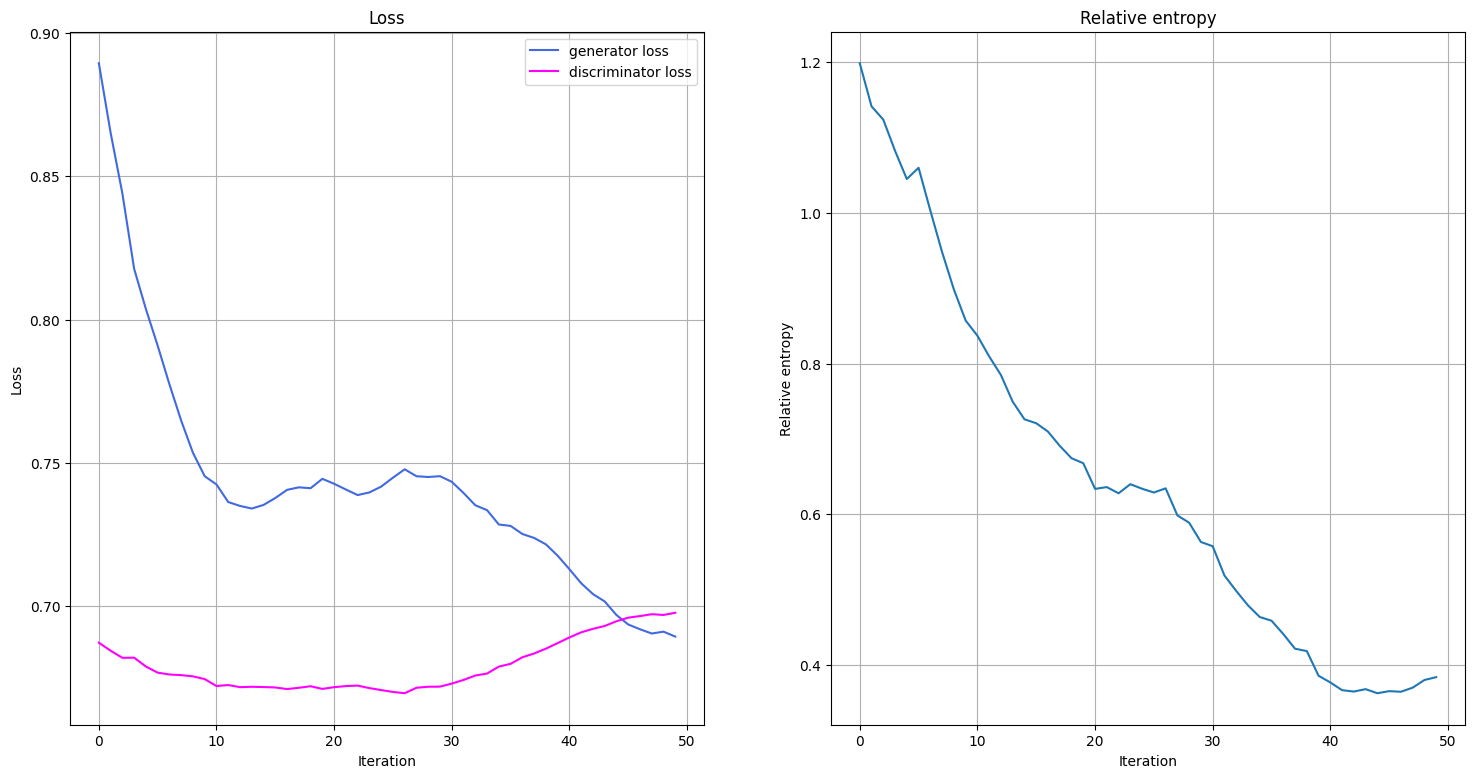

Fit in 112.18 sec


In [ ]:
n_epochs = 50

num_qnn_outputs = num_discrete_values**num_dim

generator_loss_values = []
discriminator_loss_values = []
entropy_values = []

start = time.time()
for epoch in range(n_epochs):

    valid = torch.ones(num_qnn_outputs, 1, dtype=torch.float)
    fake = torch.zeros(num_qnn_outputs, 1, dtype=torch.float)

    # Configure input
    real_dist = torch.tensor(prob_data, dtype=torch.float).reshape(-1, 1)

    # Configure samples
    samples = torch.tensor(grid_elements, dtype=torch.float)
    disc_value = discriminator(samples)

    # Generate data
    gen_dist = generator(torch.tensor([])).reshape(-1, 1)

    # Train generator
    generator_optimizer.zero_grad()
    generator_loss = adversarial_loss(disc_value, valid, gen_dist)

    # store for plotting
    generator_loss_values.append(generator_loss.detach().item())

    generator_loss.backward(retain_graph=True)
    generator_optimizer.step()

    # Train Discriminator
    discriminator_optimizer.zero_grad()

    real_loss = adversarial_loss(disc_value, valid, real_dist)
    fake_loss = adversarial_loss(disc_value, fake, gen_dist.detach())
    discriminator_loss = (real_loss + fake_loss) / 2

    # Store for plotting
    discriminator_loss_values.append(discriminator_loss.detach().item())

    discriminator_loss.backward()
    discriminator_optimizer.step()

    entropy_value = entropy(gen_dist.detach().squeeze().numpy(), prob_data)
    entropy_values.append(entropy_value)

    plot_training_progress()

elapsed = time.time() - start
print(f"Fit in {elapsed:0.2f} sec")


In [ ]:
with torch.no_grad():
    generated_probabilities = generator().numpy()

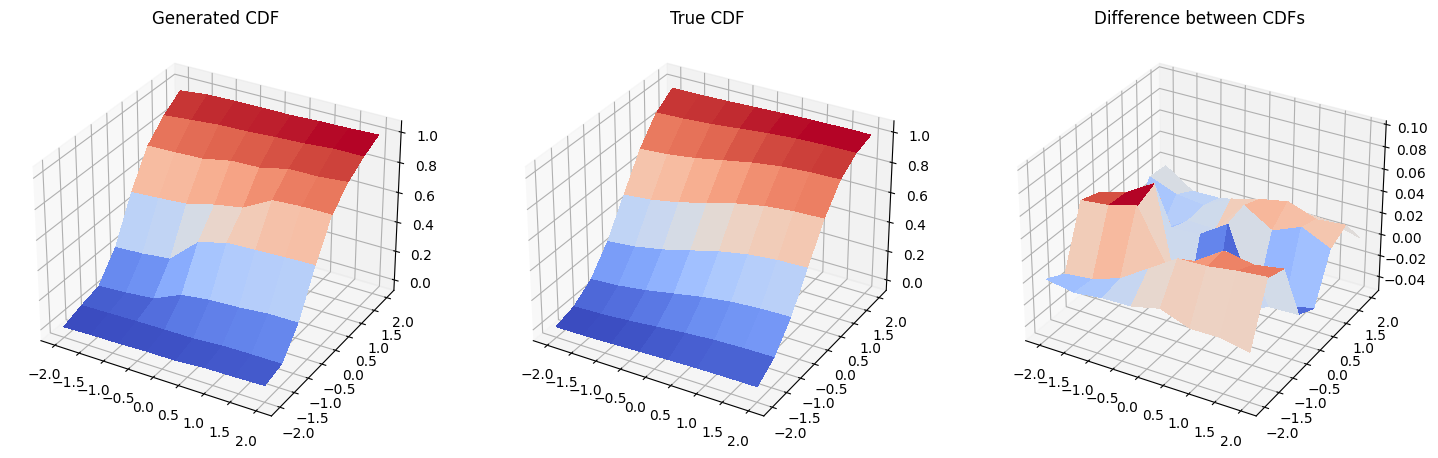

In [ ]:
fig = plt.figure(figsize=(18, 9))

# Generated CDF
gen_prob_grid = np.reshape(np.cumsum(generated_probabilities), grid_shape)

ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax1.set_title("Generated CDF")
ax1.plot_surface(mesh_x, mesh_y, gen_prob_grid, linewidth=0, antialiased=False, cmap=cm.coolwarm)
ax1.set_zlim(-0.05, 1.05)

# Real CDF
real_prob_grid = np.reshape(np.cumsum(prob_data), grid_shape)

ax2 = fig.add_subplot(1, 3, 2, projection="3d")
ax2.set_title("True CDF")
ax2.plot_surface(mesh_x, mesh_y, real_prob_grid, linewidth=0, antialiased=False, cmap=cm.coolwarm)
ax2.set_zlim(-0.05, 1.05)

# Difference
ax3 = fig.add_subplot(1, 3, 3, projection="3d")
ax3.set_title("Difference between CDFs")
ax3.plot_surface(
    mesh_x, mesh_y, real_prob_grid - gen_prob_grid, linewidth=2, antialiased=False, cmap=cm.coolwarm
)
ax3.set_zlim(-0.05, 0.1)
plt.show()


In [ ]:
%qiskit_version_table
%qiskit_copyright